# ELEC0134 - Applied Machine Learning Systems Assignment 22-23
## A1: Gender Detection

*Note preprocessing step is skipped as preprocessing was completed in SVM notebook.

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [4]:
# Loading in training and test data from npy files
X_train = np.load('all_features_train.npy')
y_train = np.load('gender_labels_train.npy')

X_test = np.load('all_features_test.npy')
y_test = np.load('gender_labels_test.npy')

In [5]:
print('features_train: ', X_train.shape)
print('features_test: ', X_test.shape)
print('labels_train: ', y_train.shape)
print('labels_test: ', y_test.shape)

features_train:  (4798, 136)
features_test:  (970, 136)
labels_train:  (4798,)
labels_test:  (970,)


In [16]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [2, 4, 6, 8, 10, 12]}


# rfm = random forest model
rfm = RandomForestClassifier()
grid_search = GridSearchCV(rfm, param_grid, verbose = 3, cv = 10)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END .....max_depth=2, n_estimators=50;, score=0.838 total time=   0.5s
[CV 2/10] END .....max_depth=2, n_estimators=50;, score=0.796 total time=   0.5s
[CV 3/10] END .....max_depth=2, n_estimators=50;, score=0.817 total time=   0.4s
[CV 4/10] END .....max_depth=2, n_estimators=50;, score=0.819 total time=   0.4s
[CV 5/10] END .....max_depth=2, n_estimators=50;, score=0.812 total time=   0.4s
[CV 6/10] END .....max_depth=2, n_estimators=50;, score=0.806 total time=   0.4s
[CV 7/10] END .....max_depth=2, n_estimators=50;, score=0.821 total time=   0.3s
[CV 8/10] END .....max_depth=2, n_estimators=50;, score=0.808 total time=   0.4s
[CV 9/10] END .....max_depth=2, n_estimators=50;, score=0.795 total time=   0.4s
[CV 10/10] END ....max_depth=2, n_estimators=50;, score=0.852 total time=   0.4s
[CV 1/10] END ....max_depth=2, n_estimators=100;, score=0.854 total time=   0.7s
[CV 2/10] END ....max_depth=2, n_estimators=10

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [17]:
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)
best_params = {'max_depth': 12, 'n_estimators': 150}

Best parameters:  {'max_depth': 12, 'n_estimators': 150}
Best score:  0.8670307063326375


In [18]:
rfm = RandomForestClassifier(**best_params_)

In [19]:
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=150)

In [20]:
y_pred = rfm.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8587628865979381


In [24]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

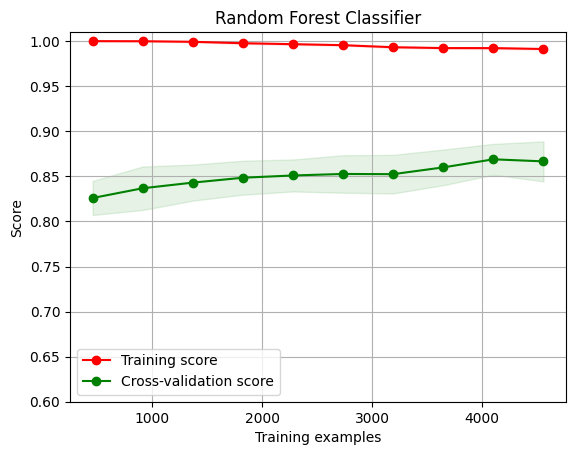

In [27]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None):


    axes[0].set_title(title)

    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs = -1, \
                       train_sizes = np.linspace(.1, 1.0, 5),
                       return_times = True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot learning curve for Random Forests algo
title = "Learning Curve for Random Forests for Gender Detection"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
plot_learning_curve(rmf, title, X_train, y_train, axes=axes, 
                    ylim=(0.7, 1.01), cv = cv)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(labels_test, y_pred, normalize = False, title = None):
    conf_matrix = confusion_matrix(labels_test, y_pred)
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    plt.imshow(conf_matrix, cmap='Blues')
    
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    if title:
        plt.title(title)

    plt.xticks([0, 1], ['0 (Negative)', '1 (Positive)'])
    plt.yticks([0, 1], ['0 (Negative)', '1 (Positive)'])

    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, round(conf_matrix[i, j], 4),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.show()

In [ ]:
plot_confusion_matrix(X_test, y_pred, normalize=True, title = 'Random Forests Face Shape')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
def plot_ROC_curve(model, features_test, labels_test, title = None):

    # predict the scores of the positive class
    y_scores = model.decision_function(features_test)

    # calculate the false positive rate, true positive rate and thresholds
    fpr, tpr, thresholds = roc_curve(labels_test, y_scores)

    # calculate the AUC
    auc = roc_auc_score(labels_test, y_scores)
    
    # plot the ROC curve
    if title:
        plt.title(title)
        
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
plot_ROC_curve(rmf, X_test, y_test, title = 'ROC curve for Random Forest model for Gender Detection')